In [ ]:
import keras
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#from zipfile import ZipFile
#filename="archive.zip"
#with ZipFile(filename,'r') as zip:
  #zip.extractall()
  #print('Done')

Done


In [ ]:
path ='/content/drive/MyDrive/SignLangDetectn/'

In [ ]:
#download = drive.CreateFile({'id': '1wG0gS-bqjV6yz1YveuxkvHT5_2DOuT05'})
#download.GetContentFile('train.csv')
train = pd.read_csv(path+'train.csv')

In [ ]:
#download = drive.CreateFile({'id': '1q_Zwlu3RncjKq1YpiVtkiMPxIIueGRYB'})
#download.GetContentFile('test.csv')
test = pd.read_csv(path+'test.csv')

In [ ]:
y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [ ]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

In [ ]:

classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=(4,4)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(26, activation='softmax'))
classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs=50, batch_size=100)


In [ ]:
accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

225/225 [==============================] - 2s 7ms/step - loss: 0.2255 - accuracy: 0.9343
Accuracy:  0.9343279600143433


## **Testing The Model**::

In [ ]:
img = X_test[502]
test_img = img.reshape((28,28))
#img_class = model.predict_classes(test_img)
predict_x=classifier.predict(test_img) 
img_class=np.argmax(predict_x,axis=1)

prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

In [ ]:
signlabels='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
print('Sign Gesture represent the {} Alphabet'.format(signlabels[classname]))

In [ ]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

## Saving the trained Model 

In [ ]:
classifier.save(path+'Livemodel.h5')
weights_file = drive.CreateFile({'title' : 'Livemodel.h5'})
weights_file.SetContentFile(path+'Livemodel.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1T22vJCIDJGozpO4TGdQVze8XAGKD3Qb1'})

## Model Classifications

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 dense_2 (Dense)             (None, 3, 3, 128)        

In [ ]:
from keras.utils.vis_utils import plot_model

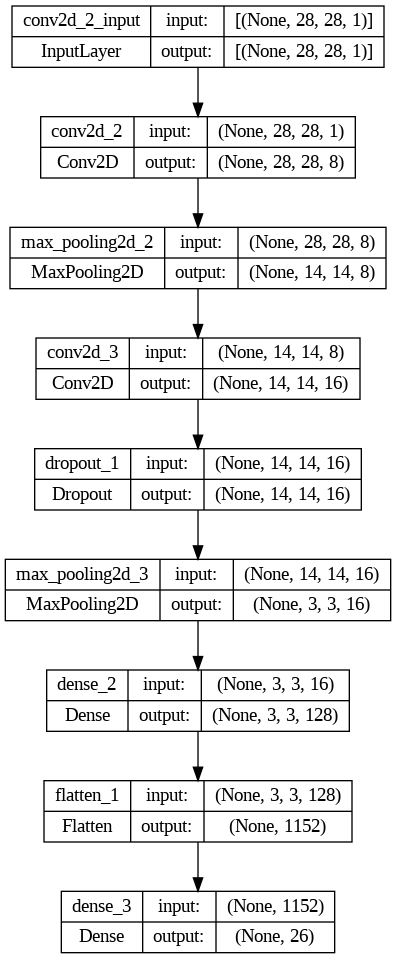

In [ ]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Double check with Python 3


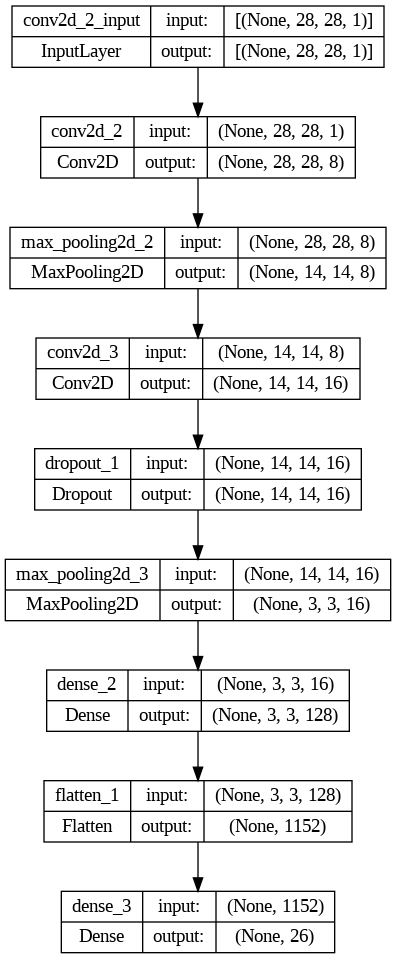

In [ ]:
plot_model(classifier, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
import openCV_final as sl
sl.detect_sign_lang(img)

In [ ]:
img = X_test[1]
test_img = img.reshape((1,784))
predict_x= classifier.predict(test_img)
img_class = np.argmax(predict_x,axis=1)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
